In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
from requests.exceptions import RequestException
import requests
from bs4 import BeautifulSoup
import cloudscraper
import re
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
eth_ticker = yf.Ticker('ETH-USD')
eth_data = eth_ticker.history(start='2024-07-23', interval='1d')
eth_data_df = pd.DataFrame(eth_data)
eth_data_df = eth_data_df.reset_index()
eth_data_df['Date'] = eth_data_df['Date'].dt.date
eth_data_df = eth_data_df.drop(columns=['Volume', 'Dividends', 'Open', 'Stock Splits', 'High', 'Low'])
eth_data_df['Date'] = eth_data_df['Date'].astype(str).str.strip()


btc_ticker = yf.Ticker('BTC-USD')
btc_data = btc_ticker.history(start='2024-01-11', interval='1d')
btc_data_df = pd.DataFrame(btc_data)
btc_data_df = btc_data_df.reset_index()
btc_data_df['Date'] = btc_data_df['Date'].dt.date
btc_data_df['Date'] = btc_data_df['Date'].astype(str).str.strip()

In [48]:
url_e = 'https://farside.co.uk/ethereum-etf-flow-all-data/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}
scraper = cloudscraper.create_scraper()
response = scraper.get(url_e, headers=headers)

soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', class_='etf')
rows = table.find_all('tr')
columns_pars = [cell.get_text(strip=True) for cell in rows[1].find_all('th')]
columns = ['Date'] + [col for col in columns_pars if col != ''] + ['Total']
print(columns)

data = []
seed = [s.get_text(strip=True) for s in rows[3].find_all('td')]
data.append(seed)

for row in rows [5:]:
    td = row.find_all('td')
    result = [t.get_text(strip=True) for t in td]
    data.append(result)
    

df_eth = pd.DataFrame(data, columns=columns)
df_eth = df_eth.iloc[:-1]
df_eth = df_eth.drop(df_eth.index[0])
df_eth.head(1500)

                     

['Date', 'ETHA', 'FETH', 'ETHW', 'TETH', 'ETHV', 'QETH', 'EZET', 'ETHE', 'ETH', 'Total']


,Date,ETHA,FETH,ETHW,TETH,ETHV,QETH,EZET,ETHE,ETH,Total
1,23 Jul 2024,266.5,71.3,204.0,7.5,7.6,5.5,13.2,(484.1),15.1,106.6
2,24 Jul 2024,17.4,74.5,29.6,0.0,19.8,2.5,3.9,(326.9),45.9,(133.3)
3,25 Jul 2024,70.9,34.3,16.3,0.0,8.0,6.2,0.0,(346.2),58.1,(152.4)
4,26 Jul 2024,87.2,39.3,16.0,0.0,0.0,0.0,6.2,(356.3),44.9,(162.7)
5,29 Jul 2024,58.2,24.8,10.4,0.0,10.9,0.0,2.5,(210.0),4.9,(98.3)
...,...,...,...,...,...,...,...,...,...,...,...
394,02 Feb 2026,(82.1),66.6,5.0,0.0,7.6,0.0,0.0,0.0,0.0,(2.9)
395,03 Feb 2026,42.9,(54.8),0.0,0.0,(2.5),1.1,0.0,8.2,19.1,14.0
396,04 Feb 2026,(58.9),(20.5),0.0,0.0,0.0,0.0,0.0,0.0,0.0,(79.4)
397,05 Feb 2026,(8.5),(55.8),0.0,0.0,0.0,3.5,0.0,(27.1),7.1,(80.8)


In [51]:
url_b = 'https://farside.co.uk/bitcoin-etf-flow-all-data/'
resp = scraper.get(url_b, headers=headers)

soup1 = BeautifulSoup(resp.text, 'html.parser')

table1 = soup1.find('table', class_='etf')
trs = table1.find_all('tr')
head = [cell.get_text(strip=True) for cell in trs[0].find_all('th')]
print(head)

data_btc = []
for tr in trs [2:]:
    td = tr.find_all('td')
    result = [d.get_text(strip=True) for d in td]
    data_btc.append(result)

df_btc = pd.DataFrame(data_btc, columns=head)
df_btc = df_btc.iloc[:-4]
df_btc.head(1500)



['Date', 'IBIT', 'FBTC', 'BITB', 'ARKB', 'BTCO', 'EZBC', 'BRRR', 'HODL', 'BTCW', 'GBTC', 'BTC', 'Total']


,Date,IBIT,FBTC,BITB,ARKB,BTCO,EZBC,BRRR,HODL,BTCW,GBTC,BTC,Total
0,11 Jan 2024,111.7,227.0,237.9,65.3,17.4,50.1,29.4,10.6,1.0,(95.1),-,655.3
1,12 Jan 2024,386.0,195.3,17.4,39.8,28.4,0.0,20.2,0.0,0.0,(484.1),-,203.0
2,15 Jan 2024,-,-,-,-,-,-,-,-,-,-,-,0.0
3,16 Jan 2024,212.7,102.0,50.2,122.3,31.9,0.0,15.3,7.3,0.0,(594.4),-,(52.7)
4,17 Jan 2024,371.4,358.1,68.2,50.3,57.6,1.2,1.2,4.8,1.6,(460.6),-,453.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,02 Feb 2026,142.0,153.3,96.5,65.1,10.1,0.0,0.0,24.3,3.3,0.0,67.2,561.8
532,03 Feb 2026,60.0,(148.7),(23.4),(62.5),0.0,(2.2),0.0,(4.8),0.0,(56.6),(33.8),(272.0)
533,04 Feb 2026,(373.4),(86.4),0.0,(31.7),0.0,(6.4),0.0,(5.2),0.0,(41.8),0.0,(544.9)
534,05 Feb 2026,(175.3),(109.5),(15.6),(23.1),0.0,0.0,0.0,0.0,0.0,(75.4),(35.2),(434.1)


/var/folders/td/zfd7w3897fv0tpz99_d2n0lc0000gn/T/ipykernel_85774/694840304.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_eth_flows['Date'] = df_eth_flows['Date'].fillna(method='ffill')
/var/folders/td/zfd7w3897fv0tpz99_d2n0lc0000gn/T/ipykernel_85774/694840304.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_btc_flows['Date'] = df_btc_flows['Date'].fillna(method='ffill')


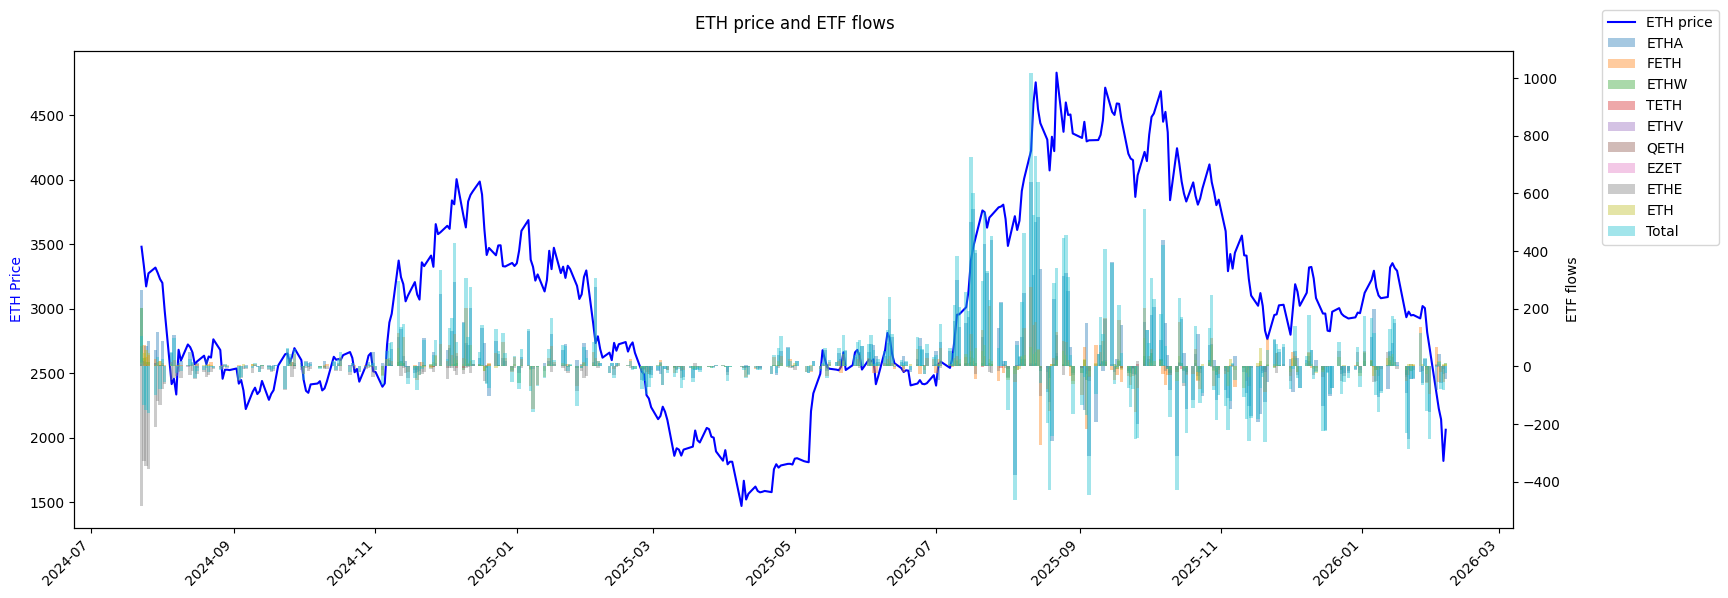


Source: Farside
Past performance not indicative of future results


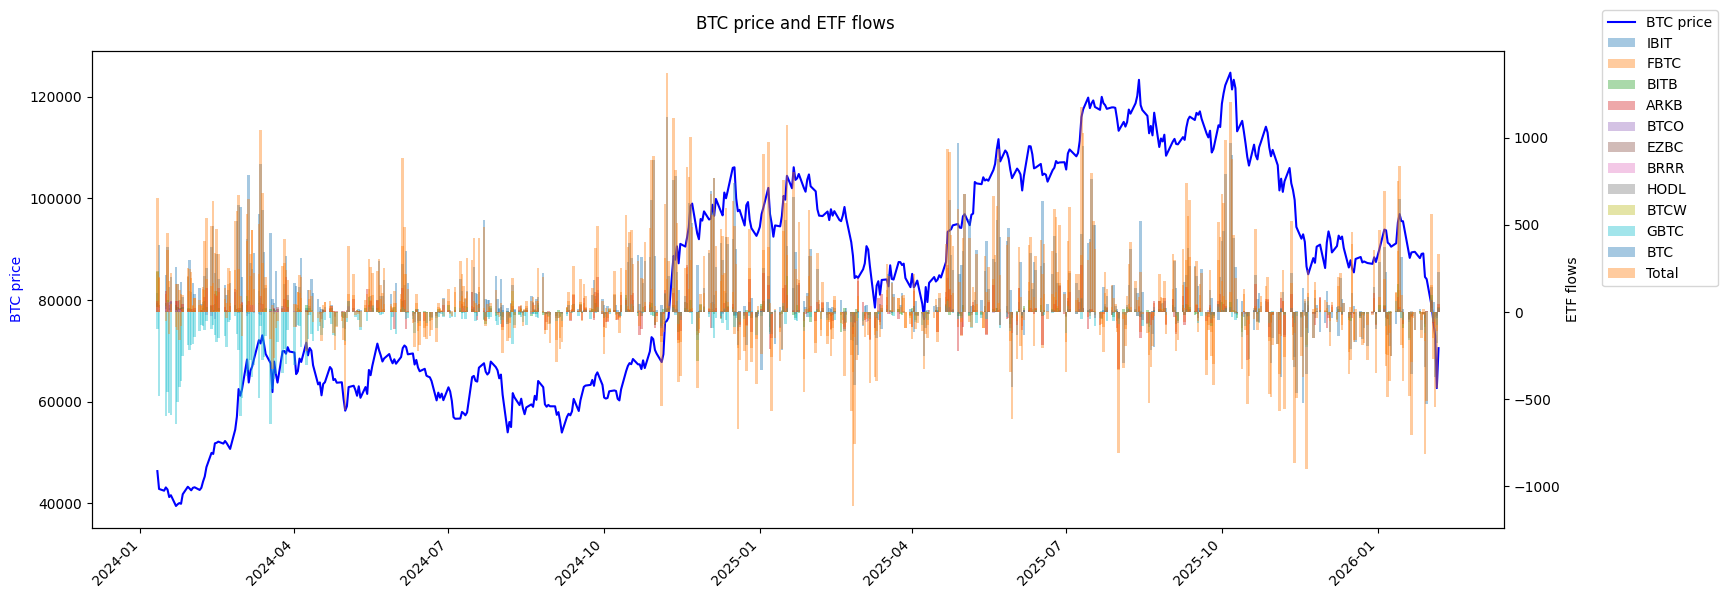


Source: Farside
Past performance not indicative of future results


In [52]:
df_eth_flows = df_eth.copy()
df_btc_flows = df_btc.copy()


def fix_number(x):
    if isinstance(x, str):
        x = x.replace(',', '')
        if x.startswith('(') and x.endswith(')'):
            return -float(x[1:-1])
        elif x == '-' or x == '':
            return 0.0
        else:
            try:
                return float(x)
            except:
                return 0.0
    return x


for ccol in df_eth_flows.columns[1:]:
    df_eth_flows[ccol] = df_eth_flows[ccol].apply(fix_number)

for cool in df_btc_flows.columns[1:]:
    df_btc_flows[cool] = df_btc_flows[cool].apply(fix_number)

df_eth_flows.loc[0, 'Date'] = '22 Jul 2024'
df_eth_flows['Date'] = df_eth_flows['Date'].astype(str).str.strip()
df_eth_flows['Date'] = pd.to_datetime(df_eth_flows['Date'], format='%d %b %Y', errors='coerce')
df_eth_flows['Date'] = df_eth_flows['Date'].fillna(method='ffill')
df1 = df_eth_flows.dropna(subset=['Date'])
df1 = df1.loc[1:].reset_index(drop=True)
df1['Date'] = df1['Date'].astype(str).str.strip()
df1 = df1.merge(
    eth_data_df[['Date', 'Close']],
    on='Date',
    how='left'
)


df_btc_flows['Date'] = df_btc_flows['Date'].astype(str).str.strip()
df_btc_flows['Date'] = pd.to_datetime(df_btc_flows['Date'], format='%d %b %Y', errors='coerce')
df_btc_flows['Date'] = df_btc_flows['Date'].fillna(method='ffill')
df2 = df_btc_flows.dropna(subset=['Date'])
df2['Date'] = df2['Date'].astype(str).str.strip()
df2 = df2.merge(btc_data_df[['Date', 'Close']], on='Date', how='left')



df1['Date'] = pd.to_datetime(df1['Date'])
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.plot(df1['Date'], df1['Close'], color='blue', label='ETH price')
ax1.set_ylabel('ETH Price', color='blue')

ax2 = ax1.twinx()
for ccol in df1.columns[1:11]:
    ax2.bar(df1['Date'], df1[ccol], label=ccol, alpha=0.4, width=1.5)
ax2.set_ylabel('ETF flows')

fig.autofmt_xdate(rotation=45)
fig.suptitle('ETH price and ETF flows')
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


print('\nSource: Farside')
print('Past performance not indicative of future results')

df2['Date'] = pd.to_datetime(df2['Date'])
fig, ex1 = plt.subplots(figsize=(16, 6))
ex1.plot(df2['Date'], df2['Close'], color='blue', label='BTC price')
ex1.set_ylabel('BTC price', color='blue')

ex2 = ex1.twinx()
for cool in df2.columns[1:13]:
    ex2.bar(df2['Date'], df2[cool], label=cool, alpha=0.4, width=1.5)
ex2.set_ylabel('ETF flows')

fig.autofmt_xdate(rotation=45)
fig.suptitle('BTC price and ETF flows')
fig.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

print('\nSource: Farside')
print('Past performance not indicative of future results')

C0


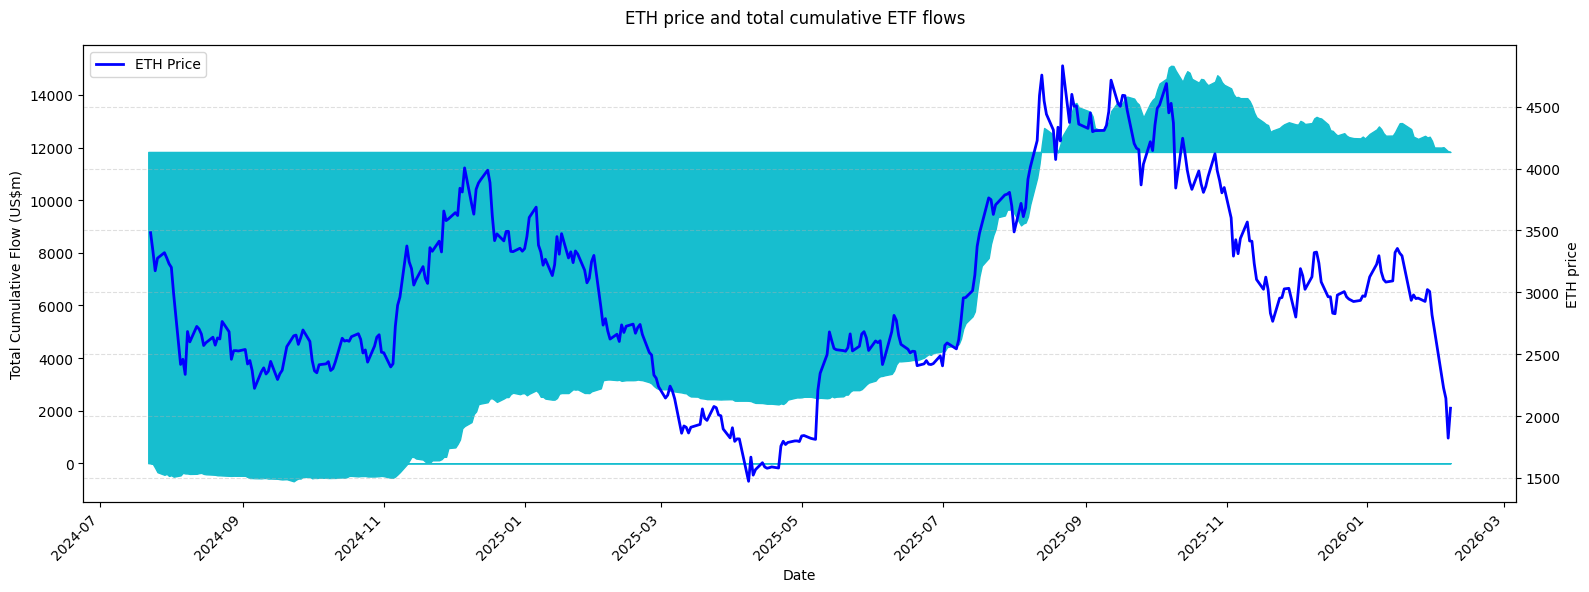


Source: Farside. Data as December 31, 2025.
Past performance not indicative of future results


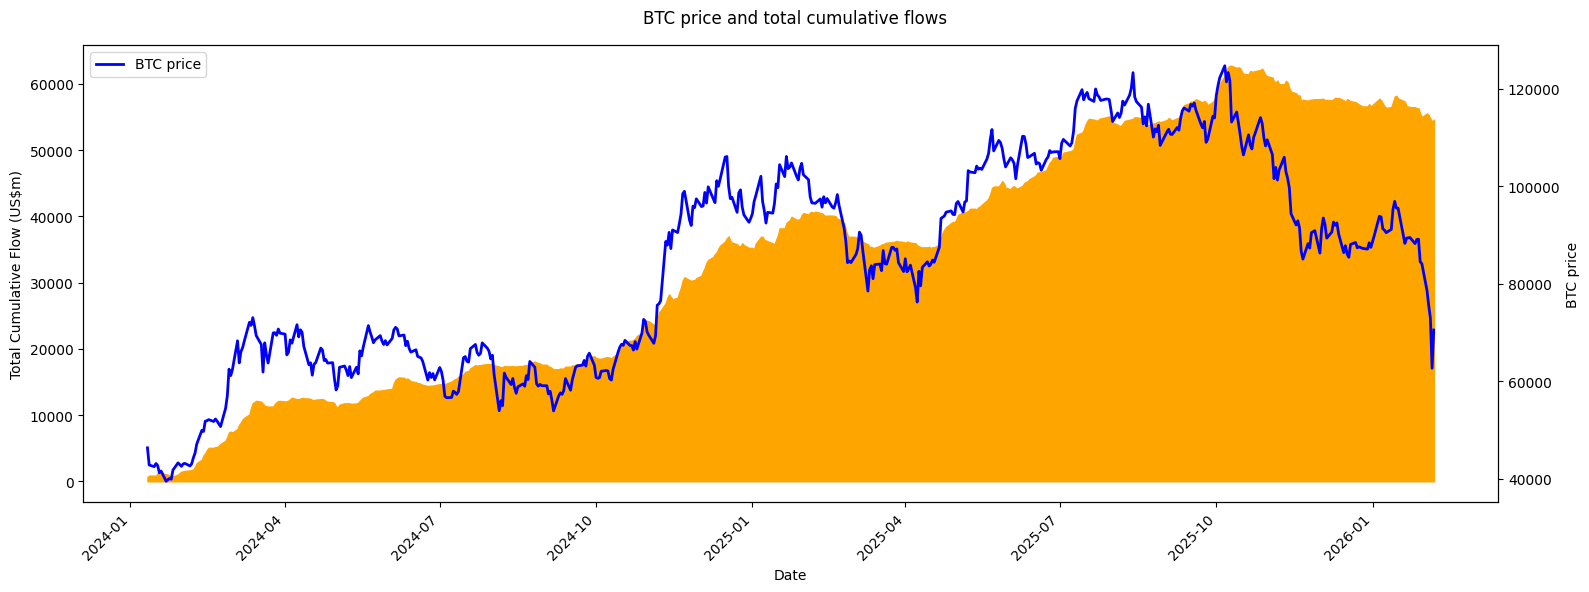


Source: Farside. Data as December 31, 2025.
Past performance not indicative of future results


In [32]:
df1_cumulative = df1.copy()
df2_cumulative = df2.copy()


columns_to_sum = df1_cumulative.columns.drop(['Date', 'Close', 'Total'])
df1_cumulative['Total_cumulative_flow'] = df1_cumulative[columns_to_sum].sum(axis=1).cumsum()


columns_to_cumulative = df2_cumulative.columns.drop(['Date', 'Close', 'Total'])
df2_cumulative['Total_cumulative_flow'] = df2_cumulative[columns_to_cumulative].sum(axis=1).cumsum()



colors = [0]
# colors = range(0, 12)
for c in colors:
    c = (f'C{c}')
    print(c)
    fig, ox1 = plt.subplots(figsize=(16, 6))
#    ox1.plot(df1_cumulative['Date'], df1_cumulative['Total_cumulative_flow'], color='C9', label='Total Cumulative Flow', linewidth=2)
    plt.fill_between(df1_cumulative['Date'], df1_cumulative['Total_cumulative_flow'], color='C9')
    ox1.set_xlabel('Date')
    ox1.set_ylabel('Total Cumulative Flow (US$m)')
    
    ox2 = ox1.twinx()
    ox2.plot(df1_cumulative['Date'], df1_cumulative['Close'], color='blue', label='ETH Price', linewidth=2)
    ox2.set_ylabel('ETH price')
    ox2.tick_params(axis='y')
    
    fig.autofmt_xdate(rotation=45)
    fig.suptitle('ETH price and total cumulative ETF flows')
    lines_eth, labels_eth = ox1.get_legend_handles_labels()
    lines2_eth,labels2_eth = ox2.get_legend_handles_labels()
    ox1.legend(lines_eth + lines2_eth, labels_eth + labels2_eth, loc='upper left')

    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    print('\nSource: Farside. Data as December 31, 2025.')
    print('Past performance not indicative of future results')





fig3, ox3 = plt.subplots(figsize=(16, 6))
#ox3.plot(df2_cumulative['Date'], df2_cumulative['Total_cumulative_flow'], color='orange', label='Total Cumulative Flow', linewidth=2)
plt.fill_between(df2_cumulative['Date'], df2_cumulative['Total_cumulative_flow'], color='orange')
ox3.set_xlabel('Date')
ox3.set_ylabel('Total Cumulative Flow (US$m)')

ox4 = ox3.twinx()
ox4.plot(df2_cumulative['Date'], df2_cumulative['Close'], color='blue', label='BTC price', linewidth=2)
ox4.set_ylabel('BTC price')

fig3.autofmt_xdate(rotation=45)
fig3.suptitle('BTC price and total cumulative flows')
lines_btc, labels_btc = ox3.get_legend_handles_labels()
lines2_btc, labels2_btc = ox4.get_legend_handles_labels()
ox3.legend(lines_btc + lines2_btc, labels_btc + labels2_btc, loc='upper left')

plt.tight_layout()
plt.show()

print('\nSource: Farside. Data as December 31, 2025.')
print('Past performance not indicative of future results')

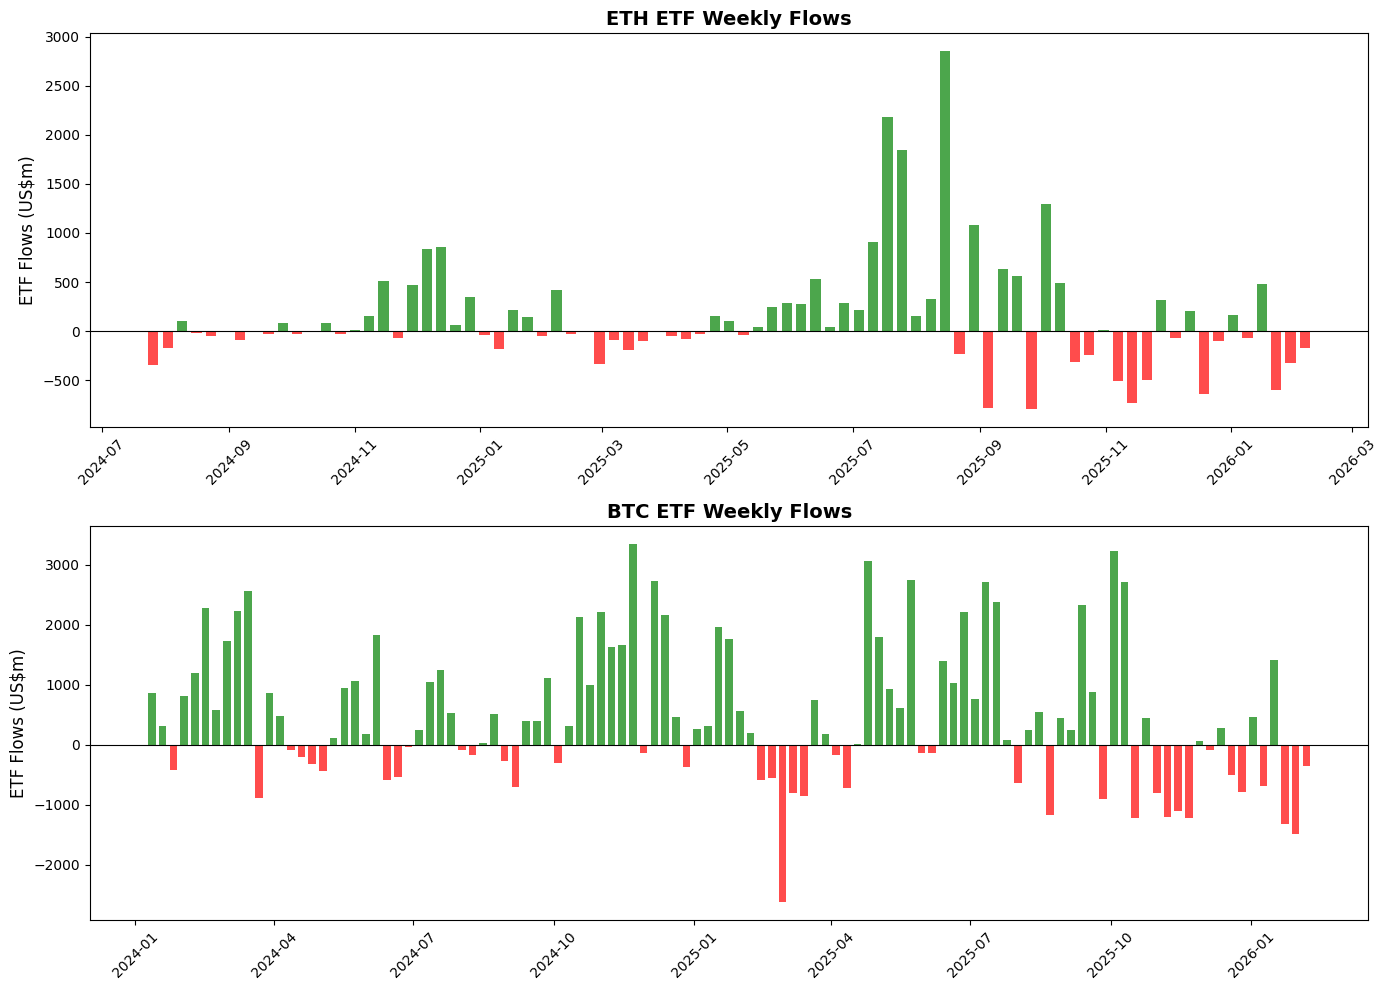

In [39]:
df1_weekly = df1.copy()
df2_weekly = df2.copy()

df1_weekly['Date'] = pd.to_datetime(df1_weekly['Date'])
df2_weekly['Date'] = pd.to_datetime(df2_weekly['Date'])
df1_weekly = df1_weekly.set_index('Date')
df2_weekly = df2_weekly.set_index('Date')
columns_1 = df1_weekly.columns.drop(['Close', 'Total'], errors='ignore')
columns_2 = df2_weekly.columns.drop(['Close', 'Total'], errors='ignore')
df1_weekly['sum'] = df1_weekly[columns_1].sum(axis=1)
df2_weekly['sum'] = df2_weekly[columns_2].sum(axis=1)

df1_weekly = df1_weekly['sum'].resample('W-FRI').sum()
df2_weekly = df2_weekly['sum'].resample('W-FRI').sum()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors1 = ['green' if x >= 0 else 'red' for x in df1_weekly]
ax1.bar(df1_weekly.index, df1_weekly, color=colors1, alpha=0.7, width=5)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.set_title('ETH ETF Weekly Flows', fontsize=14, fontweight='bold')
ax1.set_ylabel('ETF Flows (US$m)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
        
colors2 = ['green' if x >= 0 else 'red' for x in df2_weekly]
ax2.bar(df2_weekly.index, df2_weekly, color=colors2, alpha=0.7, width=5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.set_title('BTC ETF Weekly Flows', fontsize=14, fontweight='bold')
ax2.set_ylabel('ETF Flows (US$m)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()